In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [38]:
anaemic=pd.read_csv("d_output.csv")
anaemic=anaemic.drop(["Number"],axis=1)
anaemic

,Sex,Red_Pixel,Green_pixel,Blue_pixel,Hb,Anaemic
0,M,43.170845,30.945626,25.921971,6.252659,Yes
1,F,43.163481,30.306974,26.759843,8.578865,Yes
2,F,46.269997,27.315656,26.028556,9.640936,Yes
3,F,45.054787,30.469816,24.460797,4.794217,Yes
4,NaN,45.061884,NaN,24.071714,8.865329,Yes
...,...,...,...,...,...,...
495,F,45.749211,27.630846,26.865636,13.760084,No
496,F,44.929398,30.271085,24.501944,11.588917,No
497,F,43.452565,29.784122,26.764283,12.460060,No
498,F,43.224231,29.742489,26.866944,12.074058,No


In [39]:
anaemic.isnull().sum()

Sex            6
Red_Pixel      1
Green_pixel    4
Blue_pixel     4
Hb             1
Anaemic        0
dtype: int64

In [40]:
anaemic.shape

(500, 6)

In [41]:
anaemic.dtypes

Sex             object
Red_Pixel      float64
Green_pixel    float64
Blue_pixel     float64
Hb             float64
Anaemic         object
dtype: object

In [42]:
anaemic.Sex=anaemic.Sex.fillna(anaemic.Sex.mode()[0])
anaemic.Red_Pixel=anaemic.Red_Pixel.fillna(anaemic.Red_Pixel.mean())
anaemic.Green_pixel=anaemic.Green_pixel.fillna(anaemic.Green_pixel.mean())
anaemic.Blue_pixel=anaemic.Blue_pixel.fillna(anaemic.Blue_pixel.mean())
anaemic.Hb=anaemic.Hb.fillna(anaemic.Hb.mean())

In [43]:
anaemic

,Sex,Red_Pixel,Green_pixel,Blue_pixel,Hb,Anaemic
0,M,43.170845,30.945626,25.921971,6.252659,Yes
1,F,43.163481,30.306974,26.759843,8.578865,Yes
2,F,46.269997,27.315656,26.028556,9.640936,Yes
3,F,45.054787,30.469816,24.460797,4.794217,Yes
4,F,45.061884,29.385491,24.071714,8.865329,Yes
...,...,...,...,...,...,...
495,F,45.749211,27.630846,26.865636,13.760084,No
496,F,44.929398,30.271085,24.501944,11.588917,No
497,F,43.452565,29.784122,26.764283,12.460060,No
498,F,43.224231,29.742489,26.866944,12.074058,No


In [44]:
anaemic.isnull().sum()

Sex            0
Red_Pixel      0
Green_pixel    0
Blue_pixel     0
Hb             0
Anaemic        0
dtype: int64

In [45]:
label=LabelEncoder()
columns=["Sex","Anaemic"]
for i in columns:
    anaemic[i]=label.fit_transform(anaemic[i])
print(anaemic)

     Sex  Red_Pixel  Green_pixel  Blue_pixel         Hb  Anaemic
0      1  43.170845    30.945626   25.921971   6.252659        1
1      0  43.163481    30.306974   26.759843   8.578865        1
2      0  46.269997    27.315656   26.028556   9.640936        1
3      0  45.054787    30.469816   24.460797   4.794217        1
4      0  45.061884    29.385491   24.071714   8.865329        1
..   ...        ...          ...         ...        ...      ...
495    0  45.749211    27.630846   26.865636  13.760084        0
496    0  44.929398    30.271085   24.501944  11.588917        0
497    0  43.452565    29.784122   26.764283  12.460060        0
498    0  43.224231    29.742489   26.866944  12.074058        0
499    0  47.353782    26.554186   25.501462  15.207297        0

[500 rows x 6 columns]


In [46]:
anaemic.corr()

,Sex,Red_Pixel,Green_pixel,Blue_pixel,Hb,Anaemic
Sex,1.000000,0.090792,-0.154689,-0.001437,0.216989,-0.221108
Red_Pixel,0.090792,1.000000,-0.747413,-0.830217,0.449678,-0.405995
Green_pixel,-0.154689,-0.747413,1.000000,0.266182,-0.686898,0.633185
Blue_pixel,-0.001437,-0.830217,0.266182,1.000000,-0.085908,0.063120
Hb,0.216989,0.449678,-0.686898,-0.085908,1.000000,-0.838892
Anaemic,-0.221108,-0.405995,0.633185,0.063120,-0.838892,1.000000


In [47]:
anaemic.Sex.value_counts()

0    275
1    225
Name: Sex, dtype: int64

In [48]:
anaemic.Anaemic.value_counts()

1    250
0    250
Name: Anaemic, dtype: int64

In [49]:
anaemic.columns

Index(['Sex', 'Red_Pixel', 'Green_pixel', 'Blue_pixel', 'Hb', 'Anaemic'], dtype='object')

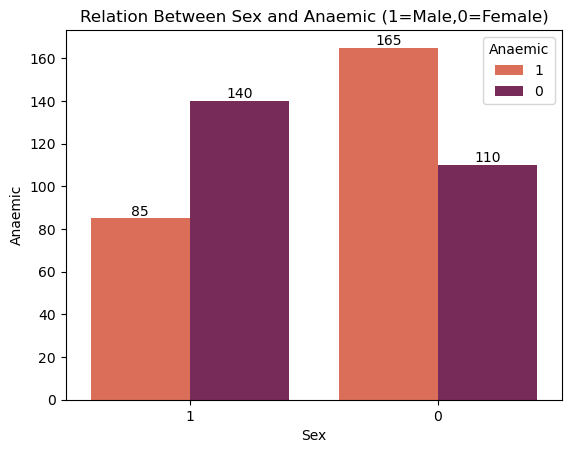

In [50]:
anaemic['Sex'] = anaemic['Sex'].astype(str)
anaemic['Anaemic'] = anaemic['Anaemic'].astype(str)
# Create the count plot
sex_Anaemic_plot = sns.countplot(data=anaemic, x='Sex', hue='Anaemic', palette='rocket_r')
# Add labels to the bars
for container in sex_Anaemic_plot.containers:
    sex_Anaemic_plot.bar_label(container)
plt.title("Relation Between Sex and Anaemic (1=Male,0=Female)")
plt.ylabel("Anaemic")
plt.show()

In [51]:
# Normal Hb Range:

# Adults:
#     Men: 13.5 to 18.0 grams per deciliter (g/dL)
#     Women (non-pregnant): 12.0 to 15.0 g/dL

In [52]:
# This column only for understaing abnormality of Hb

anaemic['Sex'] = anaemic['Sex'].astype(int)
anaemic['Anaemic'] = anaemic['Anaemic'].astype(int)
def classify_hb(row):
    if row['Sex'] == 0:
        return 'Normal' if 12.1 <= row['Hb'] <= 15.1 else 'Abnormal'
    elif row['Sex'] == 1:
        return 'Normal' if 13.8 <= row['Hb'] <= 17.2 else 'Abnormal'
    else:
        return 'Unknown'
    
anaemic['Hb_status'] = anaemic.apply(classify_hb,axis=1)
anaemic.head()

,Sex,Red_Pixel,Green_pixel,Blue_pixel,Hb,Anaemic,Hb_status
0,1,43.170845,30.945626,25.921971,6.252659,1,Abnormal
1,0,43.163481,30.306974,26.759843,8.578865,1,Abnormal
2,0,46.269997,27.315656,26.028556,9.640936,1,Abnormal
3,0,45.054787,30.469816,24.460797,4.794217,1,Abnormal
4,0,45.061884,29.385491,24.071714,8.865329,1,Abnormal


In [53]:
anaemic.Hb_status.value_counts()

Abnormal    372
Normal      128
Name: Hb_status, dtype: int64

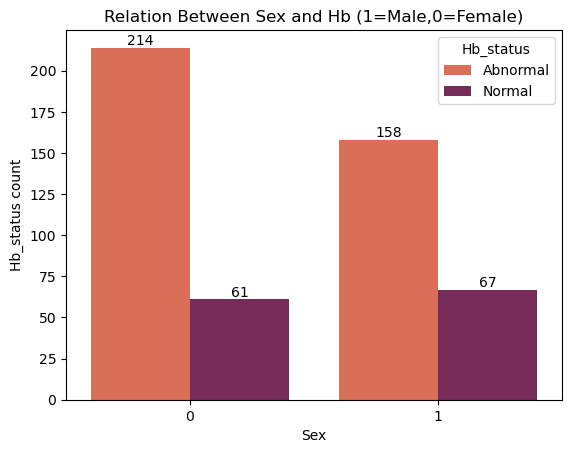

In [54]:
# Create the count plot
sex_Anaemic_plot = sns.countplot(data=anaemic, x='Sex', hue='Hb_status', palette='rocket_r')
# Add labels to the bars
for container in sex_Anaemic_plot.containers:
    sex_Anaemic_plot.bar_label(container)
plt.title("Relation Between Sex and Hb (1=Male,0=Female)")
plt.ylabel("Hb_status count")
plt.show()
anaemic=anaemic.drop(["Hb_status"],axis=1)

In [55]:
# Normal Hb Range:

# Adults:
#     Men: 40.7 to 50.3 (%) percentage
#     Women (non-pregnant): 36.1 to 44.3 %

In [56]:
# This column only for understaing abnormality of Red pixel in blood

anaemic['Sex'] = anaemic['Sex'].astype(int)
anaemic['Anaemic'] = anaemic['Anaemic'].astype(int)
def classify_Red(row):
    if row['Sex'] == 0:
        return 'Normal' if 36.1 <= row['Red_Pixel']<=44.3 else 'Abnormal'
    elif row['Sex'] == 1:
        return 'Normal' if 40.7 <= row['Red_Pixel']<=50.3 else 'Abnormal'
    else:
        return 'Unknown'
    
anaemic['Red_status'] = anaemic.apply(classify_Red,axis=1)
anaemic.head()

,Sex,Red_Pixel,Green_pixel,Blue_pixel,Hb,Anaemic,Red_status
0,1,43.170845,30.945626,25.921971,6.252659,1,Normal
1,0,43.163481,30.306974,26.759843,8.578865,1,Normal
2,0,46.269997,27.315656,26.028556,9.640936,1,Abnormal
3,0,45.054787,30.469816,24.460797,4.794217,1,Abnormal
4,0,45.061884,29.385491,24.071714,8.865329,1,Abnormal


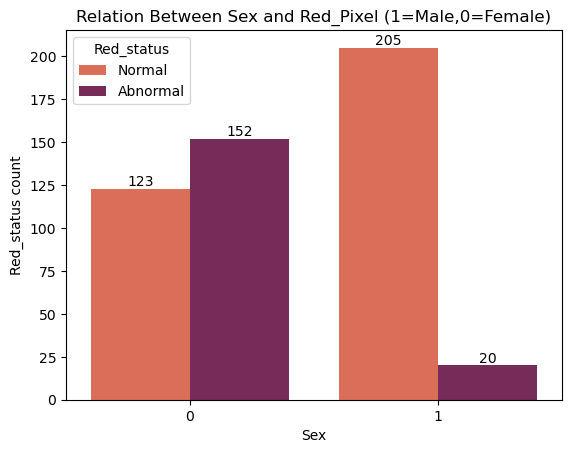

In [57]:
# Create the count plot
sex_Anaemic_plot = sns.countplot(data=anaemic, x='Sex', hue='Red_status', palette='rocket_r')
# Add labels to the bars
for container in sex_Anaemic_plot.containers:
    sex_Anaemic_plot.bar_label(container)
plt.title("Relation Between Sex and Red_Pixel (1=Male,0=Female)")
plt.ylabel("Red_status count")
plt.show()
anaemic=anaemic.drop(["Red_status"],axis=1)

In [58]:
x=anaemic.drop(["Anaemic"],axis=1)
y=anaemic["Anaemic"]
models={"logistic":{'model':LogisticRegression(),"params":{}},
       "random_forest":{"model":RandomForestClassifier(),"params":{"n_estimators":[1,10,20,100]}},
       "decision_tree":{"model":DecisionTreeClassifier(),"params":{}},
       "Gaussian":{"model":GaussianNB(),"params":{}},
       "Bernouli":{"model":BernoulliNB(),"params":{}},
        'svm':{"model":SVC(),"params":{"gamma":[1,2,100],"C":[1,2,5,100],"kernel":["poly","linear","sigmoid",'rbf']}},
        "knn":{"model":KNeighborsClassifier(),"params":{"n_neighbors":[1,10,20,100]}}}
result=[]
for i in models:
    a=models.get(i)
    model=a.get("model")
    params=a.get("params")
    cv=GridSearchCV(model,params,cv=5,return_train_score=True)
    cv.fit(x,y)
    bp=cv.best_params_
    bs=cv.best_score_
    t_res={"model":i,"best_params":bp,"best_score":bs}
    result.append(t_res)
f=pd.DataFrame(result)
f

,model,best_params,best_score
0,logistic,{},0.990
1,random_forest,{'n_estimators': 1},0.998
2,decision_tree,{},0.994
3,Gaussian,{},0.940
4,Bernouli,{},0.610
5,svm,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.998
6,knn,{'n_neighbors': 1},0.998


In [59]:
sort_value=f.sort_values("best_score",ascending=False)
print(sort_value)
print("---------*-------------*-------------*-------------*-------------*----------")
print("best model and score is",sort_value.head(1))

           model                             best_params  best_score
1  random_forest                     {'n_estimators': 1}       0.998
5            svm  {'C': 1, 'gamma': 1, 'kernel': 'poly'}       0.998
6            knn                      {'n_neighbors': 1}       0.998
2  decision_tree                                      {}       0.994
0       logistic                                      {}       0.990
3       Gaussian                                      {}       0.940
4       Bernouli                                      {}       0.610
---------*-------------*-------------*-------------*-------------*----------
best model and score is            model          best_params  best_score
1  random_forest  {'n_estimators': 1}       0.998


In [60]:
x=anaemic.drop(["Anaemic"],axis=1)
y=anaemic["Anaemic"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.32, random_state=15)
tree = DecisionTreeClassifier(random_state=24)

# Train the classifier
tree.fit(x_train, y_train)

# Make predictions on the test set
y_pred = tree.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1])

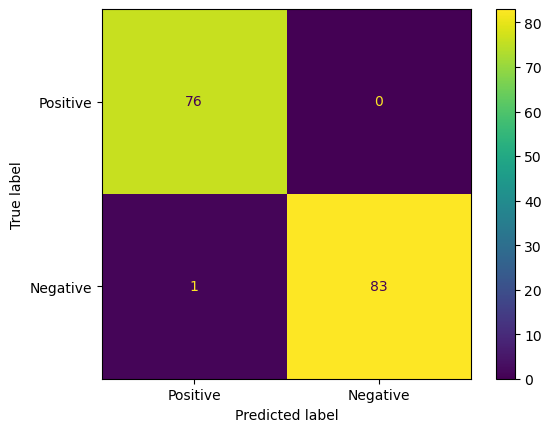

In [61]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot()

In [62]:
# Basic metrics
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test y_pred,pos_label=1))
print("Recall:",recall_score(y_test,y_pred,pos_label=1))
print("F1 Score:",f1_score(y_test,y_pred,pos_label=1))

# Full classification report
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred,target_names=["Positive","Negative"]))


Accuracy: 0.99375
Precision: 1.0
Recall: 0.9880952380952381
F1 Score: 0.9940119760479041

Classification Report:

              precision    recall  f1-score   support

    Positive       0.99      1.00      0.99        76
    Negative       1.00      0.99      0.99        84

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [65]:
# Accuracy on training data
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_pred)

# Accuracy on test data
test_accuracy=accuracy_score(y_test, y_pred)

print("Train Accuracy:",train_accuracy)
print("Test Accuracy:",test_accuracy)


Train Accuracy: 0.9941176470588236
Test Accuracy: 0.99375
